In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
%run features.py

In [6]:
file_list = [("v000_%02d" % i) + '.jpg'  for i in [2,3,4,5,6,7]]
print file_list

['v000_02.jpg', 'v000_03.jpg', 'v000_04.jpg', 'v000_05.jpg', 'v000_06.jpg', 'v000_07.jpg']


In [7]:
img_list = map(lambda x : cv2.imread('../../../data/images/' + x), file_list)

In [12]:
img_list_gray = imgs2gray(img_list)

In [13]:
corners = imgs2corners(img_list_gray, 100)
# We have up to 100 corners per image here (every corner - location in image)

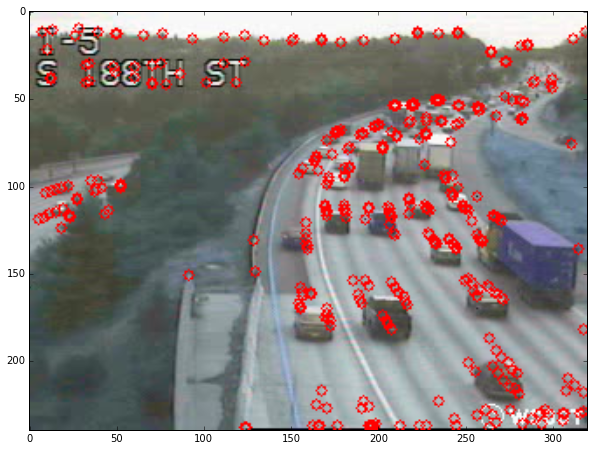

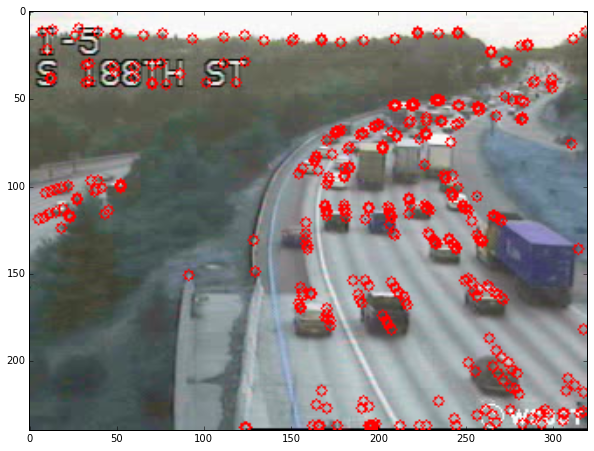

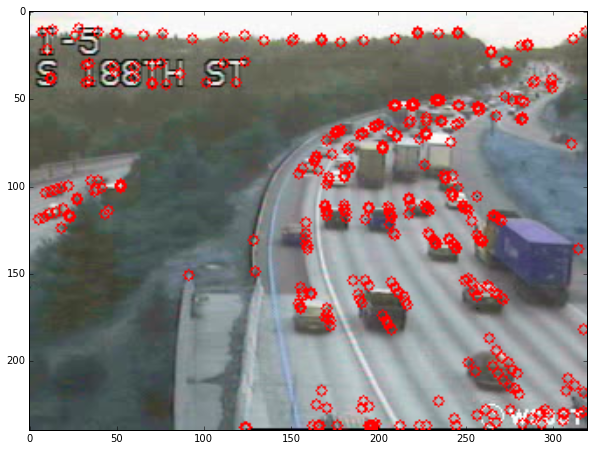

In [21]:
#Draw corners as cirles
for i in xrange(3):
        plotCorners(img_list[i], corners[i]) 

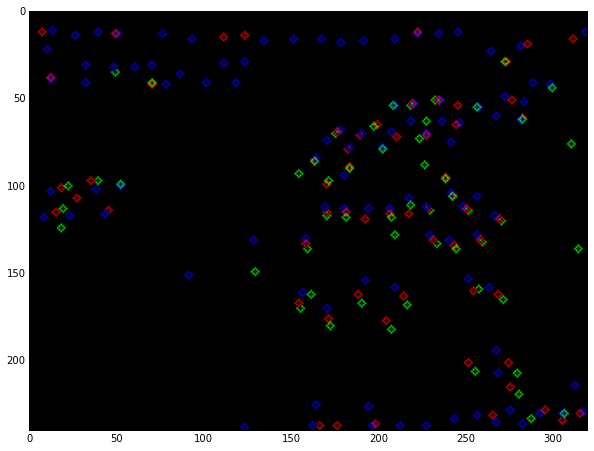

In [22]:
# Here we draw corners from 3 images on one plane
indx = [0,2,4]

img = np.zeros_like(img_list[0])

plt.figure(figsize = (10,10))

for i in corners[indx[0]]:
    x,y = i.ravel()
    cv2.circle(img,(x,y),2, (0,255,0))

for i in corners[indx[1]]:
    x,y = i.ravel()
    cv2.circle(img,(x,y),2, (255,0,0))    
    
for i in corners[indx[2]]:
    x,y = i.ravel()
    cv2.circle(img,(x,y),2, (0,0,255))    
plt.imshow(img)

In [23]:
#%timeit corners = cv2.goodFeaturesToTrack(gray,100,0.1,10)

In [28]:
print corners_bin(img_list_gray[0], corners[0], (12,16))
print np.sum(corners_bin(img_list_gray[0], corners[0], (12,16)))

[[1 2 1 1 1 1 2 1 2 1 1 2 1 0 1 1]
 [2 1 1 2 1 1 1 0 0 0 0 0 0 2 0 0]
 [0 1 0 1 0 2 0 0 0 0 2 1 1 1 2 0]
 [0 0 0 0 0 0 0 0 1 2 1 2 2 1 1 1]
 [0 1 1 0 0 0 0 1 2 1 0 2 0 0 0 0]
 [1 1 1 0 0 0 0 0 1 2 2 1 2 0 0 0]
 [1 0 0 0 0 0 1 1 0 0 1 1 2 1 0 1]
 [0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 2 1 2]]
100


In [37]:
np.abs(corners_bin(img_list_gray[1], corners[1], (12,16)) - corners_bin(img_list_gray[0], corners[0], (12,16)))

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]])

In [32]:
file_list = ([("v000_%02d" % i) + '.jpg'  for i in range(2,50,1)] +
             [("v000_%02d" % i) + '.jpg'  for i in range(2,50,1)] +
             [("v000_%02d" % i) + '.jpg'  for i in range(2,50,1)])
#print file_list

In [33]:
img_list = map(lambda x : cv2.imread('../../../data/images/' + x), file_list)

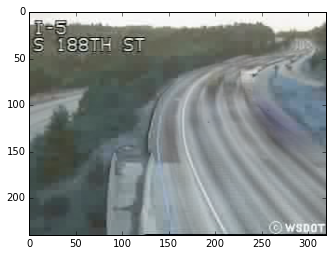

In [34]:
avr = (np.mean(img_list, axis = 0)).astype(np.uint8)
plt.imshow(avr)

In [38]:
avr_gray = cv2.cvtColor(avr,cv2.COLOR_BGR2GRAY)

In [39]:
avr_corners = np.int0(cv2.goodFeaturesToTrack(avr_gray,40,0.01,10))

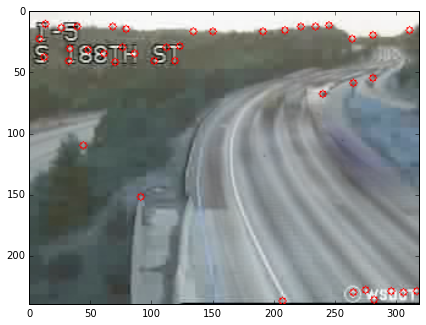

In [40]:
plt.figure(figsize = (7,7))

for i in avr_corners:
    x,y = i.ravel()
    cv2.circle(avr,(x,y),3, (255,0,0))   
plt.imshow(avr)

In [46]:
print corners_bin(avr_gray, avr_corners, (12,16))

[[1 2 0 2 0 0 1 1 0 1 1 2 1 0 0 1]
 [2 1 1 2 1 1 1 0 0 0 0 0 0 1 1 0]
 [0 1 0 1 0 2 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 2 2 2]]


In [48]:
np.save("../../../inputs/bg_grey.npy", avr_gray)
np.save("../../../inputs/bg_corners.npy", avr_corners)